# Acknowledgement & Revision Notice

This lab session material has been adapted and modified based on previous works by multiple contributors. The original tutorial was written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for CS231n and later adapted as a Jupyter notebook for CS228 by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335). The current version with Python 3 support was further adapted by Kevin Zakka for the Spring 2020 edition of [CS231n](http://cs231n.stanford.edu/).

# Numpy
`Numpy`는 Python에서 다차원 배열(array) 연산을 위한 핵심 라이브러리입니다. 배열 간의 다양한 수학적 연산을 효율적으로 수행할 수 있도록 설계되어 있으며, 내부적으로 C 및 Fortran으로 구현되어 있어 순수 Python보다 연산 속도가 훨씬 빠릅니다.

Numpy를 사용하려면 먼저 패키지를 불러옵니다. 일반적으로 `numpy`를 `np`라는 약어로 import 합니다.

In [1]:
import numpy as np

## Arrays

`numpy` 배열(`ndarray`)은 행렬 또는 그리드 형태로 값이 배열된 컨테이너(Container)로, 모든 요소가 **동일한 데이터 타입**을 가집니다. 
- 배열의 차원 수를 `rank`라고 부릅니다
- 배열의 `shape`은 각 차원의 크기를 나타내는 정수들의 튜플입니다.

Numpy 배열은 파이썬 기본 자료구조인 리스트(list)보다 훨씬 빠르고 메모리 효율적이며, 편리합니다.

Numpy는 array를 초기화 하는 다양한 함수들을 제공합니다

In [2]:
a = np.zeros((3,2))     # Create an array of all zeros with shape (2, 2)
print(a)
print("Type:", type(a))
print("Rank:", a.ndim)
print("Shape:", a.shape)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
Type: <class 'numpy.ndarray'>
Rank: 2
Shape: (3, 2)


In [3]:
b = np.ones((1,2))      # Create an array of all ones
print(b)

[[1. 1.]]


In [4]:
c = np.full((2,2), 7)   # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [5]:
d = np.eye(2)           # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [6]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.71370799 0.02169983]
 [0.7546673  0.03663653]]


In [7]:
f = np.arange(10)
print(f)

[0 1 2 3 4 5 6 7 8 9]


python 중첩 리스트(nested list)를 사용하여 초기화할 수도 있으며, 대괄호(`[]`)를 사용하여 요소에 접근할 수 있습니다.

In [8]:
arr = np.array([[1,2,3],[4,5,6]])       # 2차원 ndarray 생성
print(arr)
print("Element at (0,1):", arr[0, 1])   # 요소 접근

[[1 2 3]
 [4 5 6]]
Element at (0,1): 2


In [9]:
arr[0, 1] = 10                 # 값 변경
print(arr)                  

[[ 1 10  3]
 [ 4  5  6]]


## Array indexing
Numpy 배열은 Python 리스트와 유사하게 다양한 방식으로 인덱싱할 수 있습니다.

### Slicing
슬라이싱(Slicing)도 유사하며, 다차원 배열의 경우 각 차원마다 slice을 지정해 주어야 합니다.


In [10]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
sliced_arr = arr[:2, 1:3]

print("arr:\n", arr)
print("\narr[0, 1]:", arr[0, 1])  

print("\nSliced array arr[:2, 1:3]:\n", sliced_arr) 

arr:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

arr[0, 1]: 2

Sliced array arr[:2, 1:3]:
 [[2 3]
 [6 7]]


numpy array도 mutable(변경 가능)이며 슬라이싱한 데이터를 수정하면 원본 배열도 함께 변경됩니다.  
이는 슬라이싱된 배열이 원본 배열의 복사본(copy)이 아니라 **뷰(view)**로서 동일한 데이터를 참조하기 때문입니다.

In [11]:
sliced_arr[0, 0] = 77    # sliced_arr[0,0]은 arr[0,1]과 동일한 데이터를 참조
print("arr:\n", arr)

arr:
 [[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


### Integer array indexing
Numpy 배열을 **슬라이싱(slicing)** 하면 항상 원본 배열의 subarray가 반환됩니다.

반면, <b>정수 배열 인덱싱(integer array indexing)</b>을 사용하면 원본 배열에서 특정 요소들을 선택하여 새로운 배열을 구성할 수 있습니다.

In [12]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

print("\nSelected rows:\n", a[[0, 2], :])

[[1 2]
 [3 4]
 [5 6]]

Selected rows:
 [[1 2]
 [5 6]]


In [13]:
print("Selected rows:\n", a[[0, 2, 0], :]) # 같은 element를 반복해서 indexing할 수도 있다

Selected rows:
 [[1 2]
 [5 6]
 [1 2]]


In [14]:
print(a[[0, 1, 2], [0, 1, 0]])  #[0, 1, 2] : 1차원 index 지정 //  [0, 1, 0] : 2차원 index
print(np.array([a[0, 0], a[1, 1], a[2, 0]])) # 위와 동일한 표현

[1 4 5]
[1 4 5]


정수 배열 인덱싱을 활용하면 **각 행(row)에서 특정 위치의 요소들를 선택하거나 변경**할 수 있습니다.  

이를 활용하면 각 행에서 서로 다른 열(column)의 요소를 효율적으로 가져오거나 수정할 수 있습니다. (예: ground truth class의 logit값 추출하기)

In [15]:
matrix = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print("matrix: \n", matrix)

selected_columns = np.array([0, 2, 0, 1])  # 각 행에서 가져올 열의 index
print("Selected values from each row:\n", matrix[np.arange(4), selected_columns])   # b에 의해 선택된 각 행의 열의 값을 가져온다

matrix: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Selected values from each row:
 [ 1  6  7 11]


In [16]:
matrix[np.arange(4), selected_columns] += 10   #값을 변경한다
print(matrix)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


### Integer indexing
정수 인덱싱과 슬라이싱을 혼합하여 사용할 수도 있습니다.  
그러나 정수 인덱싱을 사용하면 원본 배열보다 차원(rank)이 낮아질 수 있으므로 <mark>주의</mark>해야 합니다.

In [17]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])    # rank 2 array 생성

row_r1 = arr[1, :]    # 정수로 indexing한 경우 차원이 낮아진다.
row_r2 = arr[1:2, :]  # slicing할 경우 차원이 유지된다.
row_r3 = arr[[1], :]  # 리스트로 indexing할 경우 차원이 유지된다

print(f"Original array (shape = {arr.shape}):\n", arr)
print("arr[1, :]\t:", row_r1, f"\t(shape = {row_r1.shape})") 
print("arr[1:2, :]\t:", row_r2, f"\t(shape = {row_r2.shape})")
print("arr[[1], :]\t:", row_r3, f"\t(shape = {row_r3.shape})")

Original array (shape = (3, 4)):
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
arr[1, :]	: [5 6 7 8] 	(shape = (4,))
arr[1:2, :]	: [[5 6 7 8]] 	(shape = (1, 4))
arr[[1], :]	: [[5 6 7 8]] 	(shape = (1, 4))


### Boolean array indexing

Boolean array indexing을 사용하여 원하는 위치의 요소들을 선택할 수 있습니다.  
이 기법은 특정 조건을 만족하는 값들을 선택하거나 필터링할 때 자주 활용됩니다

In [18]:
arr = np.array([[1,2], [3, 4], [5, 6]])
print("Oritial array (arr):\n", arr)

boolean_mask = (arr > 2)  # 원본 배열과 동일한 shape을 가지며, 각 요소가 조건을 만족하는지 여부를 표시
print("arr > 2 (boolean_mask):\n", boolean_mask) # boolean mask
print(boolean_mask) 

Oritial array (arr):
 [[1 2]
 [3 4]
 [5 6]]
arr > 2 (boolean_mask):
 [[False False]
 [ True  True]
 [ True  True]]
[[False False]
 [ True  True]
 [ True  True]]


In [19]:
print("arr[boolean_mask]\t: ", arr[boolean_mask])    # True에 해당하는 요소들만 가져온다.
print("arr[arr > 2]\t\t: ",arr[arr > 2])         # 더 간단하게 표현할 수도 있다

arr[boolean_mask]	:  [3 4 5 6]
arr[arr > 2]		:  [3 4 5 6]


## Datatypes

모든 Numpy 배열은 **동일한 데이터 타입**을 가진 요소들로 구성된 그리드(grid)입니다.  

Numpy는 다양한 <b>숫자형 데이터 타입(numeric datatypes)</b>을 지원하며([docs](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)), 배열을 생성할 때 자동으로 적절한 타입을 추론합니다. 그러나 대부분의 Numpy 배열 생성 함수에서는 데이터 타입을 명시적으로 지정할 수 있는 옵션 또한 제공합니다.


In [20]:
x = np.array([1, 2])            # numpy가 데이터 타입을 자동으로 추정한다.
y = np.array([1.0, 2.0])        # numpy가 데이터 타입을 자동으로 추정한다.
z = np.array([1, 2], dtype=np.int32)  # 데이터 타입을 명시적으로 지정한다.

print(x.dtype, y.dtype, z.dtype)

int64 float64 int32


지정된 타입과 맞지 않는 값을 할당하면 자동으로 변환(casting)되거나 손실(loss)될 수 있으므로 <mark>주의</mark>하세요

In [21]:
x = np.zeros((2,2), dtype = np.int64)
x[1,1] = 0.1
print(x)

[[0 0]
 [0 0]]


## Array math

기본적인 수학 연산은 **배열의 각 요소에 대해 개별적으로(element-wise) 수행**됩니다.  
이러한 연산은 연산자(operator)를 이용할 수도, Numpy 모듈의 함수를 이용하여 수행할 수도 있습니다.

In [22]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [23]:
# Elementwise difference; 
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [24]:
# Elementwise product; 
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [25]:
# Elementwise division; 
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [26]:
# Elementwise square root;
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


`*` 이 elementwise multiplication임에 주의하세요.

벡터 간의 내적이나, 행렬과 벡터의 곱, 혹은 행렬간의 곱은 ``dot``함수를 이용합니다

In [27]:
mat1 = np.array([[1,2],[3,4]])
mat2 = np.array([[5,6],[7,8]])

vec1 = np.array([9,10])
vec2 = np.array([11, 12])

# 백터간의 내적
print(vec1.dot(vec2))     # 인스턴스 메서드를 이용
print(np.dot(vec1, vec2)) # Numpy 모듈의 함수를 이용

219
219


In [28]:
# Matrix / vector product; produce the rank 1 array
print(mat1.dot(vec1))
print(np.dot(mat1, vec1))

[29 67]
[29 67]


In [29]:
# Matrix / matrix product; produce the rank 2 array
print(mat1.dot(mat2))
print(np.dot(mat1, mat2))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


`matmul` 함수나 `@` 연산자를 이용할 수도 있으며 <b>2차원 이하의 행렬(벡터, 매트릭스)</b>에서는 `dot()`, `matmul()`, `@`의 결과가 동일합니다.
 
하지만, 3차원 이상의 배열에서는 동작 방식이 다를 수 있습니다. 자세한 사항은 공식 문서를 참고하세요
- [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)
- [`np.matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)


In [30]:
print(np.matmul(mat1, mat2))
print(mat1 @ mat2)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy는 배열 연산을 위한 다양한 수학적 함수들을 제공합니다.  
그중에서도 가장 유용한 함수 중 하나가 **`sum()`** 함수입니다.

그 외에도 numpy에서 제공하는 다양한 함수들은 [docs](http://docs.scipy.org/doc/numpy/reference/routines.math.html)를 참고하세요

In [31]:
x = np.array([[1,2],[3,4], [5,6]])  # shape (3,2)

print("Original array x:\n", x)
print("Total Sum: ", np.sum(x))            # 배열 전체 요소들의 합
print("Sums along the rows (axis = 0): ", np.sum(x, axis=0))       # 각 열(column)별 합 (axis = 0)
print("Sums along the columns (axis = 1): ", np.sum(x, axis=1))    # 각 행(row)별 합 (axis=1)
print("Shape with keepdims:", np.sum(x, axis=1, keepdims = True).shape)         # 차원 유지

Original array x:
 [[1 2]
 [3 4]
 [5 6]]
Total Sum:  21
Sums along the rows (axis = 0):  [ 9 12]
Sums along the columns (axis = 1):  [ 3  7 11]
Shape with keepdims: (3, 1)


## Reshape

배열의 **구조(shape)를 변경**하려면 `reshape()` 함수를 사용할 수 있습니다.  
이를 통해 데이터의 순서는 유지하면서, **새로운 차원과 형태로 배열을 변환**할 수 있습니다.

In [32]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])  # 1D 배열 생성
b = np.reshape(a, (2, 4))   # (2,4) shape으로 변환
c = np.reshape(a, (4, 2))   # (4,2) shape으로 변환

print("Original array (1D):", a)
print("Reshaped (2,4):\n", b)
print("Reshaped (4,2):\n", c)

Original array (1D): [1 2 3 4 5 6 7 8]
Reshaped (2,4):
 [[1 2 3 4]
 [5 6 7 8]]
Reshaped (4,2):
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


`reshape()` 에서 특정 차원의 크기를 -1로 설정하면,
Numpy가 자동으로 해당 차원의 크기를 계산하여 shape을 맞춰줍니다.

In [33]:
c = np.reshape(a, (-1, 2))  # -1은 자동으로 계산된다
print("shape:", c.shape)

shape: (4, 2)


`.T` 속성(attribute)을 사용하여 **행렬을 전치(transpose)**할 수 있습니다.  

In [34]:
print(x)
print(x.T)

[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


`np.concatenate()`를 사용하면 기존 배열을 이어 붙여서 하나의 배열을 생성할 수 있습니다.

연결할 축(axis)을 제외한 모든 차원이 동일해야 합니다.

In [35]:
arr1 = np.array([[1, 2], [3, 4]])  # shape (2,2)
arr2 = np.array([[5, 6]])          # shape (1,2)

concatenated_arr = np.concatenate((arr1, arr2), axis=0)
print("arr1:\n", arr1)
print("arr2:\n", arr2)
print("Concatenated along axis 0:\n", concatenated_arr)  # shape (3,2)

arr1:
 [[1 2]
 [3 4]]
arr2:
 [[5 6]]
Concatenated along axis 0:
 [[1 2]
 [3 4]
 [5 6]]


## Broadcasting

**Broadcasting**은 Numpy에서 서로 다른 **shape**을 가진 배열 간에도 연산을 수행할 수 있도록 해주는 강력한 기능입니다.  

우리는 보통 **하나의 큰 배열**과 **작은 배열**을 갖고 있으며, 작은 배열을 여러 번 반복하여 큰 배열과 연산을 수행하고자 합니다

예를들어 한 행렬의 각 행마다 어떤 vector를 더한다고 생각해보자

In [36]:
input_matrix = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
row_vector = np.array([1, 0, -1])
output_matrix = np.empty_like(input_matrix)   # Create an empty matrix with the same shape as `input_matrix``

for i in range(4):
    output_matrix[i, :] = input_matrix[i, :] + row_vector

print("Input matrix:\n", input_matrix)
print("Row vector: ", row_vector)
print("Output matrix:\n", output_matrix)

Input matrix:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Row vector:  [ 1  0 -1]
Output matrix:
 [[ 2  2  2]
 [ 5  5  5]
 [ 8  8  8]
 [11 11 11]]


위 코드는 명시적인 `for` 문을 사용하여 각 행을 개별적으로 처리하기 때문에, 행렬 x의 크기가 커질수록 실행 속도가 느려지는 문제가 발생합니다.

사실 이 연산은 벡터 `v`를 여러번 복사하여 (vertical stack) 새로운 행렬 `vv`를 만들고, `x`와 `vv`를 elementwise로 더하는 것과 동일합니다.

In [37]:
vector_tiled = np.tile(row_vector, (4, 1))      # Stack 4 copies of `row_vector` on top of each other. Shape : (4, 3)
output_matrix = input_matrix + vector_tiled     # Add elementwise

print("Input matrix:\n", input_matrix)
print("Tiled row vector :\n", vector_tiled)
print("Output matrix:\n", output_matrix)


Input matrix:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Tiled row vector :
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Output matrix:
 [[ 2  2  2]
 [ 5  5  5]
 [ 8  8  8]
 [11 11 11]]


Numpy broadcasting은 이러한 과정을 자동으로 해줍니다.

즉 broadcasting은 크기가 작은 배열을 **자동으로 확장(expand)**하여 크기가 큰 배열과 연산할 수 있도록 해주며, 이를 통해 반복문을 없이도 **효율적으로 텐서 연산을 수행**할 수 있습니다.

<img src="resources/broadcasting.jpg" style="width:500px;">

In [38]:
input_matrix = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
row_vector = np.array([1, 0, -1])
output_matrix = input_matrix + row_vector  # Broadcasting을 이용하여 벡터 v를 행렬 x의 각 행에 더하기

print("Input matrix:\n", input_matrix)
print("Row vector: ", row_vector)   
print("Output matrix (input_matrix + row_vector):\n", output_matrix)

Input matrix:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Row vector:  [ 1  0 -1]
Output matrix (input_matrix + row_vector):
 [[ 2  2  2]
 [ 5  5  5]
 [ 8  8  8]
 [11 11 11]]


위 연산에서 벡터 `v`는 실제로 `(4, 3)`의 shape을 갖고 각 행이 벡터 `v`의 복제본인 행렬인것처럼 동작합니다

Broadcasting은 단순히 벡터와 행렬 간의 연산뿐만 아니라,  
**행렬-스칼라 연산, 행렬-행렬 연산, 텐서-텐서 연산 등 다양한 경우**에서 강력하게 활용될 수 있습니다.

In [39]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])   # (2,3)
row_vector = np.array([[10, 20, 30]])       # (1,3)
column_vector = np.array([[100], [200]])    # (2,1)

print(f"matrix (shape={matrix.shape}):\n", matrix)
print(f"Row vector (shape={row_vector.shape}):\n", row_vector)
print(f"Column vector (shape={column_vector.shape}):\n", column_vector)

print("\nRow-wise Broadcasting (matrix + row_vector):\n", matrix + row_vector)  # 행마다 벡터 더하기
print("Column-wise Broadcasting (matrix + column_vector):\n", matrix + column_vector)    # 열마다 벡터 더하기

matrix (shape=(2, 3)):
 [[1 2 3]
 [4 5 6]]
Row vector (shape=(1, 3)):
 [[10 20 30]]
Column vector (shape=(2, 1)):
 [[100]
 [200]]

Row-wise Broadcasting (matrix + row_vector):
 [[11 22 33]
 [14 25 36]]
Column-wise Broadcasting (matrix + column_vector):
 [[101 102 103]
 [204 205 206]]


In [40]:
matrix = np.array([[1, 2, 3], [4, 5, 6]]) # shape (2, 3)
scalar = 10

result = matrix + scalar  # scalar를 shape ()인 array로 생각하여, shape (2, 3)으로 broadcast

print("matrix:\n", matrix)
print("matrix + scalar:\n", result)

matrix:
 [[1 2 3]
 [4 5 6]]
matrix + scalar:
 [[11 12 13]
 [14 15 16]]


Broadcasting을 활용하면 코드가 **더 간결하고 실행 속도가 빨라집니다**. 가능한 경우 Broadcasting을 사용해 보세요.

Broadcasting에는 여러 규칙들이 있으며, 자세한 내용은 [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) 또는 [explanation](http://wiki.scipy.org/EricsBroadcastingDoc)을 참고하세요.

간단히 요약하면, 

- 두 배열의 차원(rank)이 다르면, 작은 배열의 shape 앞쪽에 `1`을 추가하여 차원을 맞춥니다.
 
- 어떤 차원에서 한 배열의 크기(size)가 `1`이고, 다른 배열의 크기가 `>1`이면, 크기 `1`인 배열은 해당 차원에서 복제된 것처럼 동작.


더 자세하게는 [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) 과 [설명](http://wiki.scipy.org/EricsBroadcastingDoc)을 참고할것.

broadcasting을 지원하는 함수는 universal functions이라고 불립니다. Universal function들의 목록은 [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)를 참고하세요.



In [41]:
# 행렬의 각 행에 벡터 더하기
matrix = np.array([[1,2,3], [4,5,6]])    # shape (2, 3)
vector_rank1 = np.array([1, 0, -1])      # shape (3,) -> (2, 3)으로 broadcast된다
result = matrix + vector_rank1

print(f"matrix (shape={matrix.shape}):\n", matrix)
print(f"Rank1 vector (shape={vector_rank1.shape}):\n", vector_rank1)
print("matrix + vector_rank1:\n", result)  # 행마다 벡터 더하기

matrix (shape=(2, 3)):
 [[1 2 3]
 [4 5 6]]
Rank1 vector (shape=(3,)):
 [ 1  0 -1]
matrix + vector_rank1:
 [[2 2 2]
 [5 5 5]]


In [42]:
# 행렬의 각 열에 벡터 더하기
matrix = np.array([[1,2,3], [4,5,6]])    # shape (2, 3)
vector_rank1 = np.array([4,5])           # shape (2,)
result = (matrix.T + vector_rank1).T

print(f"matrix (shape={matrix.shape}):\n", matrix)
print(f"Rank1 vector (shape={vector_rank1.shape}):\n", vector_rank1)
print("result:\n", result)  # # transpose(x)를 통해 shape (3, 2)를 얻어 더한다.

matrix (shape=(2, 3)):
 [[1 2 3]
 [4 5 6]]
Rank1 vector (shape=(2,)):
 [4 5]
result:
 [[ 5  6  7]
 [ 9 10 11]]


In [43]:
# 더 자연스러운 방법
matrix = np.array([[1,2,3], [4,5,6]])             # shape (2, 3)
column_vector = np.reshape(vector_rank1, (2, 1))  # 또 다른 방법은 reshape하여 shape (2, 1)로 만드는 것이다.
result = matrix + column_vector  # shape (2, 3)으로 broadcast된다

print(f"matrix (shape={matrix.shape}):\n", matrix)
print(f"Column vector (shape={column_vector.shape}):\n", column_vector)
print("matrix + column_vector:\n", result) 

matrix (shape=(2, 3)):
 [[1 2 3]
 [4 5 6]]
Column vector (shape=(2, 1)):
 [[4]
 [5]]
matrix + column_vector:
 [[ 5  6  7]
 [ 9 10 11]]


### Vector representation

행렬(Matrix)은 일반적으로 **rank-2 array**로 표현되며, `shape (M, N)`을 가집니다.

Numpy에서 <b>벡터(Vector)</b>는 여러 방식으로 표현될 수 있으며, <b>배열의 차원(shape)</b>에 따라 연산 결과가 다를 수 있습니다

1. rank-1 vector (`shape (N,)`)
   - **1차원 배열**로, 행(row)과 열(column) 개념이 없음.
   - 행렬연산시 암묵적인 처리로 인해 예상치 못한 결과가 나올 수 있음 **(deep learning에서 지양함)**

2. rank-2 representaion
   - 열 벡터(Column Vector, `shape (N,1)`): `N`개의 행과 1개의 열을 가지는 **2D 배열**.
   - 행 벡터 (Row Vector, `shape (1,N)`): 1개의 행과 `N`개의 열을 가지는 **2D 배열**.

In [44]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])  # Shape (2,3)
vector_rank1 = np.array([1, 2, 3])         # Shape (3,)
result = matrix @ vector_rank1             # (2,3) @ (3,) → (2,) (⚠️ 차원 축소)

print(f"matrix (shape={matrix.shape}):\n", matrix)
print(f"Rank-1 vector (shape={vector_rank1.shape}):\n", vector_rank1)
print(f"matrix @ rank1 vector (shape={result.shape}):\n", result)  
print("result.T.shape:", result.T.shape)            # Transpose does nothing! Still (2,), NOT (2,1)!

matrix (shape=(2, 3)):
 [[1 2 3]
 [4 5 6]]
Rank-1 vector (shape=(3,)):
 [1 2 3]
matrix @ rank1 vector (shape=(2,)):
 [14 32]
result.T.shape: (2,)


In [45]:
# 더 나은 방식: Explicit column vector
matrix = np.array([[1, 2, 3], [4, 5, 6]])    # Shape (2,3)
column_vector = vector_rank1.reshape(-1, 1)  # Shape (3,1)
result = matrix @ column_vector           # (2,3) @ (3,1) → (2,1)

print(f"matrix (shape={matrix.shape}):\n", matrix)
print(f"column vector (shape={column_vector.shape}):\n", column_vector)
print(f"matrix @ vector (shape={result.shape}):\n", result)  
print("result.T.shape:", result.T.shape)

matrix (shape=(2, 3)):
 [[1 2 3]
 [4 5 6]]
column vector (shape=(3, 1)):
 [[1]
 [2]
 [3]]
matrix @ vector (shape=(2, 1)):
 [[14]
 [32]]
result.T.shape: (1, 2)


In [46]:
vector_rank1 = np.array([1, 2, 3])         # Shape (3,)
column_vector = np.array([[1], [2], [3]])  # Shape (3,1)
result = vector_rank1 + column_vector

print(f"Rank-1 Vector (shape={vector_rank1.shape}):\n", vector_rank1)
print(f"Column Vector (shape={column_vector.shape}):\n", column_vector)
print("rank-1 Vector + column Vector:\n",result)  # Broadcasting 연산시에도 예상과 다르게 동작할 가능성 있음

Rank-1 Vector (shape=(3,)):
 [1 2 3]
Column Vector (shape=(3, 1)):
 [[1]
 [2]
 [3]]
rank-1 Vector + column Vector:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]


코드가 예상대로 동작하도록 하기위한 가장 좋은 방법은 <mark>배열의 shape을 항상 확인</mark>하고,
작은 테스트 케이스를 실행해 보거나, 필요할 때 문서(documentation)를 참고하는 것입니다.

## Avoiding Explicit `for` Loop
파이썬 행렬(텐서) 연산시 **Explicit `for` Loop(명시적 반복문)**을 사용하면 연산 속도가 크게 저하될 수 있습니다.
- Dynamic Typing Overhead: Python은 **동적 타입(dynamic typing)** 언어이므로, `for` 루프 내에서 각 반복마다 변수 타입을 확인해야 함.
- Function Call Overhead (함수 호출 오버헤드): `for` 루프 내에서 다른 연산을 위한 함수를 호출하면 매 반복마다 함수 호출 비용이 추가됨.
- Interpreter Execution Overhead : Python은 인터프리티드(Interpreted) 언어이므로, `for` 루프를 실행할 때마다 명령어를 해석하고 실행하는 비용이 발생.
- Memory Access Inefficiency : Python의 기본 리스트는 각 요소가 개별적으로 저장되어 있어 for 루프에서 데이터를 읽고 쓰는 과정에서 캐시 효율성이 낮아짐. 반면, Numpy 배열은 메모리상에서 연속된 블록(contiguous block)으로 저장되므로, CPU 캐시 활용도가 높아져 연산 속도를 빠르게 할 수 있음.

반면 <b>Vectorization(벡터화)</b>는 `for` 루프를 사용하지 않고 배열 연산을 한 번에 수행하는 것으로, 
이 방식은 Numpy의 내부 최적화된 C 기반 연산을 활용하여 `for` 반복문보다 훨씬 빠르게 연산을 수행할 수 있습니다.



In [47]:
%%timeit
nums = np.arange(10**6)     # shape (10**6,)
result = np.empty_like(nums)

for i in range(len(nums)):
    result[i] = nums[i] ** 2

66 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%%timeit
nums = np.arange(10**6)     # shape (10**6,)
result = np.square(nums)    # 200 times faster than the above code

450 μs ± 10.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


딥러닝에서는 다음과 같은 **선형 변환 (linear transformation)**이 자주 사용됩니다:

$$ y = W \cdot x$$

In [49]:
%%timeit
W = np.random.rand(1000, 100)  
x = np.random.rand(100, 1)  

y_loop = np.zeros((1000, 1))
for i in range(1000):
    y_loop[i] = np.dot(W[i, :], x) 

696 μs ± 2.31 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [50]:
%%timeit
W = np.random.rand(1000, 100)  
x = np.random.rand(100, 1) 

y_vectorized = np.dot(W, x)     # 1,000 Timers faster

248 μs ± 123 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Matplotlib

**Matplotlib**은 Python에서 **데이터 시각화(visualization)**를 위한 대표적인 라이브러리이며, `matplotlib.pyplot` 모듈을 사용하면 **손쉽게 그래프를 생성하고 스타일을 지정**할 수 있습니다.  

In [51]:
import matplotlib.pyplot as plt

``plot`` 함수를 이용해 을 통해 2D 데이터를 시각화 할 수 있습니다

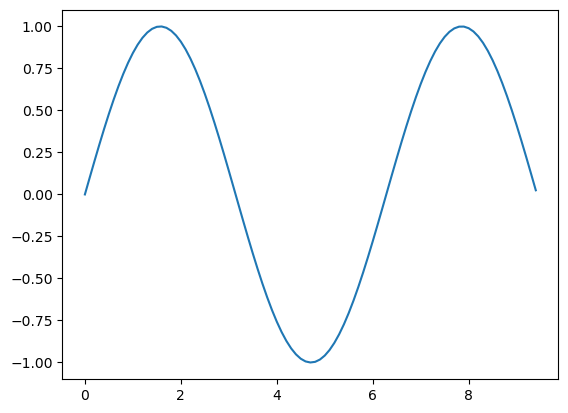

In [52]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

아래와 같이 여러 개의 라인을 플롯할수도 있고 제목(title), 범례(legend), 축 라벨(axis label) 등을 추가할 수 있습니다

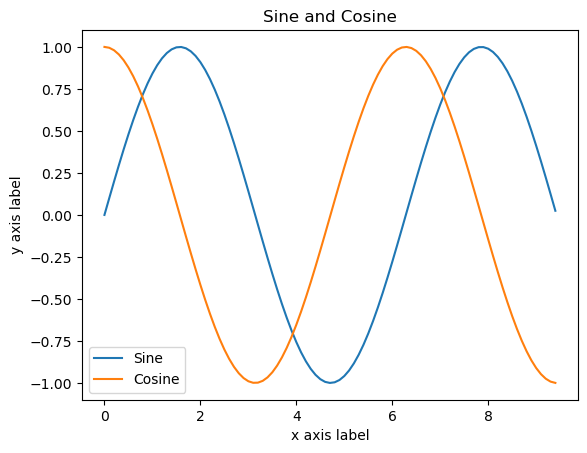

In [53]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

`subplot`을 이용하여 여러개의 여러개의 plot을 한 이미지(figure)에 배치할 수 있습니다

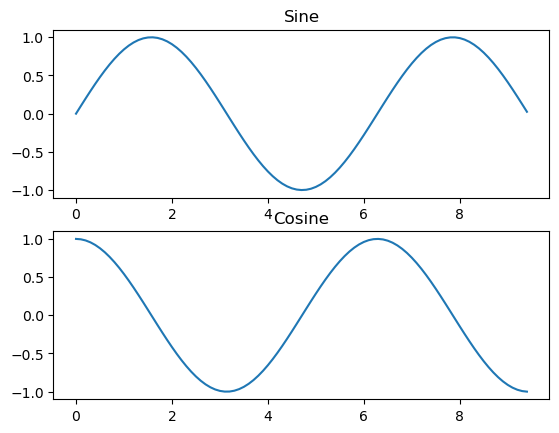

In [54]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

# Logistic Regression

이 실습에서는 로지스틱 회귀(Logistic Regression)를 구현해보며 이를 신경망(Neural Network)의 관점에서 이해해봅니다. 

아래 그림은 로지스틱 회귀가 사실 매우 간단한 형태의 신경망임을 보여줍니다.

<img src="resources/perceptron.png" style="width:500px;">

## Mathematical expression of the logistic regression

For one example $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$:

$$ z^{(i)} = \mathbf{x}^{(i)} \cdot \mathbf{w} + b \tag{Linear Combination}$$
$$\hat{y}^{(i)} = a^{(i)} = \text{sigmoid}(z^{(i)}) \tag{Sigmoid}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)})  \log(1-a^{(i)}) \tag{Binary Cross Entropy Loss}$$
  
전체 학습 데이터에 대한 비용 함수(Cost function)은 다음과 같이 계산됩니다:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import load_data

## Breast Cancer Dataset (유방암 진단 데이터셋)
이번 실습에서는 사이킷런(scikit-learn)의 유방암 진단 데이터셋을 활용하여 로지스틱 회귀(Logistic Regression) 모델을 학습해 봅니다. 

Input Features
- Mean Radius (평균 반지름): 종양 중심에서 외곽까지의 거리의 평균값 (종양의 크기)
- Mean Texture (평균 텍스처): standard deviation of gray-scale values (종양 조직의 균일도)

Target (label)
이 데이터셋의 목표는 종양이 악성(Malignant)인지, 양성(Benign)인지 예측하는 것입니다.
- 악성(Malignant) → `1`
- 양성(Benign) → `0`




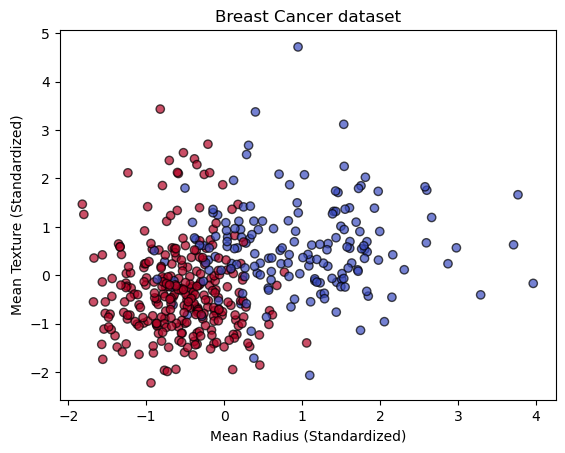

In [56]:
X_train, X_test, y_train, y_test = load_data()

def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="coolwarm", edgecolors="k", alpha=0.7)
    plt.xlabel("Mean Radius (Standardized)")
    plt.ylabel("Mean Texture (Standardized)")
    plt.title("Breast Cancer dataset")
    plt.show()

plot_data(X_train, y_train)

<mark>실습</mark> 데이터셋 `X_train`, `X_test`, `y_train`, `y_test`의 차원(dimensions)과 shape을 살펴보고 다음 값들이 얼마인지 조사해보세요
- `m_train` (number of training examples)
- `m_test` (number of test examples)
- `d` (number of features)

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
m_train = X_train.shape[0]   # TODO
m_test =  X_test.shape[0]    # TODO
d = X_train.shape[1]          # TODO

(455, 2) (114, 2) (455, 1) (114, 1)


## <mark>실습</mark> Building the logistic regression

### Step 1: 파라미터 초기와 (`__init__()`)
로지스틱 회귀 모델의 파라미터(Parameter)를 정의하고 초기화하는 함수 `__init__()`을 완성하세요
- **가중치(Weights, `w`)**: shape `(num_features, 1)`인 열 벡터이며 0으로 초기화 합니다. ([`np.zeros()`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) 이용)
- **바이어스(Bias, `b`)**: 스칼라 값이며, 0으로 초기화합니다

### Step 2: sigmoid function (`sigmoid()`)
선형 조합 결과를 확률값 (0~1)로 변환하는 함수 `sigmoid()`를 완성하세요
$$\sigma(z) = \text{sigmoid}(z) = \frac{1}{1 + e^{-z}}$$
- `np.exp()`함수를 이용하세요
- 입력 `z`는 스칼라일 수도, `numpy` 배열일 수도 있습니다.

### Step 3: 순전파, 비용 함수 계산 및 역전파 (`propagate()`)
한 번의 순전파(forward pass)와 역전파(backward pass)를 수행하여 현재 파라미터에 대한 <b>비용(cost)</b>과 <b>미분(gradient)</b>를 계산하는 함수 `propagate()`를 완성하세요.

순전파(Forward Propagation) 과정:
- Linear Combination : $\mathbf{Z} = \mathbf{X}\mathbf{w}+b$
  - $ \mathbf{w} \in \mathbb{R}^{d \times 1} $
  - $ \mathbf{X} \in \mathbb{R}^{m \times d} $
  - $m$ is the number of examples and $d$ is the number of input features
  
- 활성화 함수 적용:
$$\mathbf{A} = \sigma(\mathbf{Z}) =
  \begin{bmatrix}
  a^{(1)} \\
  a^{(2)} \\
  \vdots \\
  a^{(m)}
  \end{bmatrix}
  \in \mathbb{R}^{m \times 1}$$

- 비용 함수 계산 (Binary Cross-Entropy Loss, Negative log-likelihood): 
$$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$$

역전파(Backward Propagation) 과정 (Gradient 계산):
$$ \frac{\partial J}{\partial \mathbf{w}} = d\mathbf{w} = \frac{1}{m} \mathbf{X}^T (\mathbf{A} - \mathbf{y}) \in \mathbb{R}^{d \times 1} $$
$$ \frac{\partial J}{\partial b} = db = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)}) \in \mathbb{R} $$

힌트
- [`np.log()`](https://numpy.org/doc/stable/reference/generated/numpy.log.html), [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html), [`np.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), [`np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) 함수들을 활용하세요
- `for` 루프를 사용하지 마세요.

### Step 4: Optimization (`optimize()`)
경사 하강법 (Gradient Descent)를 이용해 파라미터 `w`와 `b`를 업데이트하는 `optimize` 함수를 완성하세요.

목표는 cost function $J$를 최소로 하는 파라미터 $\mathbf{w}$와 $b$를 찾는 것으로, 어떤 파라미터 $\theta$와 learning rate $\alpha$가 주어졌을때 아래 규칙에 따라 업데이트 합니다
$$ \theta = \theta - \alpha \text{ } \frac{\partial J}{\partial \theta} $$

### Step 5: 예측 (`predict()`)
이제 학습된 가중치와 바이어스를 사용하여 새로운 데이터에 대한 예측을 수행하는 함수 `predict()`를 완성하세요

$$ \mathbf{A} = \sigma(\mathbf{X}\mathbf{w} + b) \tag{Predicted Probabilities} $$

$$
y_\text{pred}^{(i)} =
\begin{cases}
1, & \text{if } a^{(i)} > 0.5 \\
0, & \text{if } a^{(i)} \leq 0.5
\end{cases}
\quad \text{for } i = 1, \dots, m \tag{Thresholding} $$

힌트
- [`np.ndarray.astype()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) 또는 [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)함수를 이용하세요

In [62]:
class LogisticRegression:
    def __init__(self, num_features):
        """
        로지스틱 회귀 모델의 가중치(w)와 바이어스(b)를 초기화합니다.
        
        Args:
            num_features -- 입력 데이터의 feature 개수
        """
        self.weights = np.zeros((num_features, 1))  # TODO, zero vectors with shape (num_features, 1)
        self.bias = 0

    def sigmoid(self, z):
        """
        Compute the sigmoid(z).

        Args:
            z: 스칼라 또는 numpy array

        Returns:
            s: sigmoid(z)
        """

        s = 1 / (1 + np.exp(-z))    # TODO. np.exp 함수를 사용하세요. 
        return s
    
    def propagate(self, X, y):
        """
        비용 함수(cost function)와 미분(gradient)을 계산합니다

        Args:
            X: 입력 데이터. shape: (num_samples, num_features)
            y: 정답 레이블(label). shape: (num_samples, 1)

        Return:
            cost: 비용 함수 값
            dw: gradient of the cost with respect to w, shape: (num_features, 1)
            db: gradient of the loss with respect to b
        
        """
        
        m, num_features = X.shape
        
        ##### YOUR CODE START #####
        # compute cost and gradients
        # do NOT use for loop
        A =  self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
        dw = (1 / m) * np.dot(X.T, (A - y)) 
        db = (1 / m) * np.sum(A - y)
        ##### YOUR CODE END #####
        
        cost = np.squeeze(np.array(cost))
        
        return cost, dw, db

    def optimize(self, X, y, num_iterations, learning_rate):
        """
        경사 하강법(gradient descent)을 이용해 w와 b를 최적화합니다.
        
        Args:
            X: 입력 데이터 (num_samples, num_features)
            Y: 정답 레이블 (num_samples, 1)
            num_iterations: number of iterations of the optimization loop
            learning_rate: learning rate of the gradient descent update rule
        
        Returns:
            costs -- list of all the costs computed during the optimization
        
        Tips:
            1) self.propagate()함수를 이용하여 cost와 gradient를 계산합니다
            2) gradient descent rule에 따라 w와 b를 업데이트합니다.
        """
        
        costs = []
        
        for i in range(num_iterations):
            cost, dw, db = self.propagate(X, y) # Cost and gradient calculation 

            ##### YOUR CODE START #####
            # Update weights and bias
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            ##### YOUR CODE END #####
            
            if i % 100 == 0: 
                costs.append(cost.item()) # Record the costs
                print ("Cost after iteration %i: %f" %(i, cost))
        
        return costs
    
    def predict(self, X):
        '''
        학습된 가중치와 바이어스를 사용하여 예측을 수행합니다.
        
        Args:
            X (numpy.ndarray): 입력 데이터, shape (num_samples, num_features)
        
        Returns:
            y_pred (numpy.ndarray): contains all predictions (0/1) for the examples in X, shape: (num_samples, 1)
            A (numpy.ndarray): contains all predicted probabilities for the examples in X, shape: (num_samples, 1)
        '''

        A = self.sigmoid(np.dot(X, self.weights) + self.bias)   # TODO. Compute vector "A" predicting the probabilities
        y_pred =  (A > 0.5).astype(int)    # TODO. Convert probabilities A to actual predictions 0/1. Do NOT use for loop
        return y_pred, A

아래 코드를 통해 구현을 테스트해보세요.

In [63]:
model = LogisticRegression(num_features= 5)
print("[Testing __init__] model.weights:\n", model.weights, "\nmodel.bias:", model.bias)

print("\n[Testing sigmoid] sigmoid(1): ", model.sigmoid(1), ", sigmoid([0, 1]):", model.sigmoid(np.array([0, 1])))

np.random.seed(0)  # For reproducibility
X = np.random.randn(4, 5)  # 4 samples, 5 features
y = np.array([[1], [0], [1], [0]])  # Shape: (4, 1)
print("\n[Testing propagate]")
cost, dw, db = model.propagate(X, y)
print("Cost:", cost)
print("dw:\n", dw)
print("db:", db)


print("\n[Testing optimize]")
costs = model.optimize(X, y, num_iterations=300, learning_rate=0.1)
print("costs: ", costs)


print("\n[Testing predict]")
y_pred, probs = model.predict(X)
print("Predicted labels:", y_pred.flatten())
print("Predicted probabilities:", probs.flatten())

[Testing __init__] model.weights:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]] 
model.bias: 0

[Testing sigmoid] sigmoid(1):  0.7310585786300049 , sigmoid([0, 1]): [0.5        0.73105858]

[Testing propagate]
Cost: 0.6931471805599453
dw:
 [[-0.31896243]
 [ 0.0737171 ]
 [-0.2620364 ]
 [-0.26908992]
 [-0.34436481]]
db: 0.0

[Testing optimize]
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.204696
Cost after iteration 200: 0.127366
costs:  [0.6931471805599453, 0.20469569768851978, 0.12736584081793165]

[Testing predict]
Predicted labels: [1 0 1 0]
Predicted probabilities: [0.99980824 0.10480172 0.84769463 0.08418298]


In [64]:
from helpers import test_init, test_sigmoid, test_propagate, test_optimize, test_predict, test_logistic_regression
model = LogisticRegression(num_features= 10)
test_init(model)
test_sigmoid(model)
test_propagate(model)
test_optimize(model)
test_predict(model)

model = LogisticRegression(num_features = 4)
test_logistic_regression(model)


print('\033[92mAll tests passed!')

Cost after iteration 0: 5.801545
Cost after iteration 100: 0.310571
Cost after iteration 0: 0.693147
All tests passed!


In [65]:
from helpers import visualize_decision_boundary, visualize_costs

def evaluate_accuracy(y_pred, y):
    accuracy = np.mean(y_pred == y)
    return accuracy

def main(learning_rate, num_iterations):
    """ Main function to load data, train the model, evaluate performance, and visualize results."""
    X_train, X_test, y_train, y_test = load_data()
    model = LogisticRegression(num_features = X_train.shape[1])
    costs = model.optimize(X_train, y_train, num_iterations = num_iterations, learning_rate = learning_rate)
    y_pred_train, y_prob_train = model.predict(X_train)
    y_pred_test, y_prob_test = model.predict(X_test)
    print(f"Train Accuracy: {evaluate_accuracy(y_pred_train, y_train) * 100:.2f}%")
    print(f"Test Accuracy: {evaluate_accuracy(y_pred_test, y_test) * 100:.2f}%")
    visualize_costs(costs, learning_rate = learning_rate)
    visualize_decision_boundary(model, X_train, y_train)


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.326369
Cost after iteration 200: 0.292905
Train Accuracy: 88.35%
Test Accuracy: 89.47%


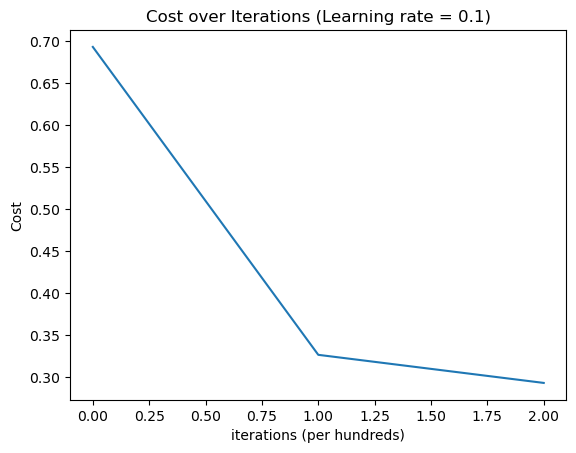

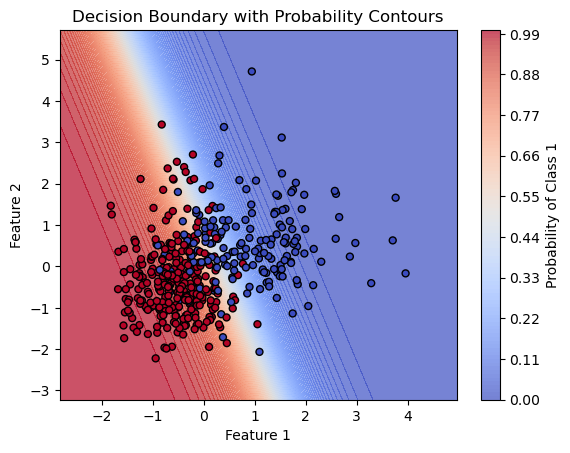

In [66]:
main(num_iterations = 300, learning_rate = 0.1)

훈련(Train) 데이터와 테스트(Test) 데이터의 정확도(Accuracy)가 모두 약 90% 수준으로 나타나며, 이는 모델이 적절히 학습되었음을 의미합니다.

### Hyperparameters
- 모델 학습을 위해 사용자가 설정하는`num_iterations`와 `learning_rate`값은 하이퍼파라미터(Hyperparameter) 라고 불립니다. 
- 이는 모델이 직접 학습하는 파라미터(Parameter) 와 달리, 사용자가 미리 지정하는 값이며 학습 과정에 중요한 영향을 미칩니다.

1. `num_iterations`
   - 위 그래프를 살펴보면, 학습이 진행됨에 따라 Cost 값이 점진적으로 감소하는 것을 확인할 수 있습니다. 이는 모델의 파라미터(`parameter`) 가 점점 최적의 값을 찾아가고 있다는 것을 의미합니다.
   - `num_iterations` 값을 늘리면 더 낮은 Cost 값으로 수렴할 가능성이 있지만, 너무 많이 설정하면 계산 비용이 증가하고 수렴이 완료된 이후에도 불필요한 연산을 하게 될 수 있습니다.

2. Learning rate
   - Gradient Descent(경사 하강법)를 효과적으로 수행하려면 <b>적절한 학습률(learning rate, $\alpha$)</b>을 잘 선택해야 합니다.
   - 학습률이 너무 크면 → 최적값을 지나쳐서 계속 진동(oscillation) 하거나 발산(Divergence) 할 가능성이 있음.
   - 학습률이 너무 작으면 → 학습이 매우 느려지고, 최적값에 도달하기까지 많은 iteration이 필요함.
   - 적절한 학습률을 설정하면 → 빠르게 수렴하면서 안정적으로 최적값을 찾을 수 있음.

<mark>실습</mark> Hyperparamter tunning
- 하이퍼파라미터(`num_iterations`, `learning_rate`)를 조정하며 최적의 조합을 찾아보세요.
- learning_rate를 너무 크게 설정하거나 너무 작게 설정하면 하면 어떤 일이 발생하는지 확인해보세요.
 

Cost after iteration 0: 0.693147
Train Accuracy: 87.91%
Test Accuracy: 89.47%


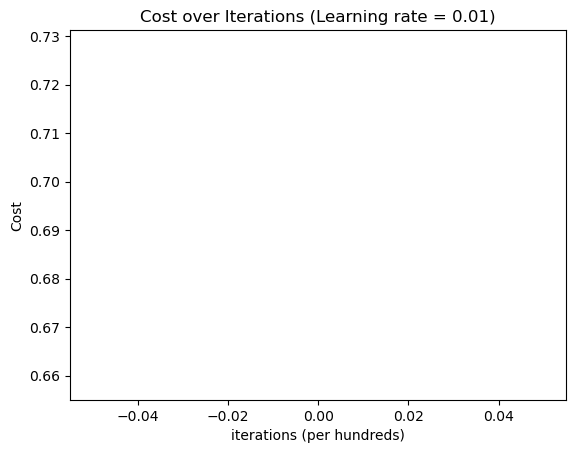

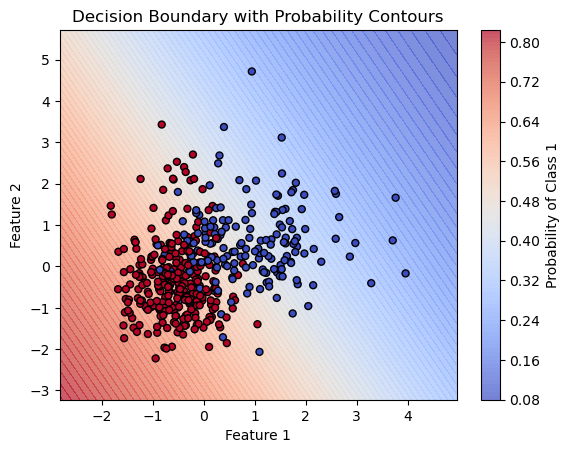

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.560135
Cost after iteration 200: 0.484302
Train Accuracy: 88.13%
Test Accuracy: 88.60%


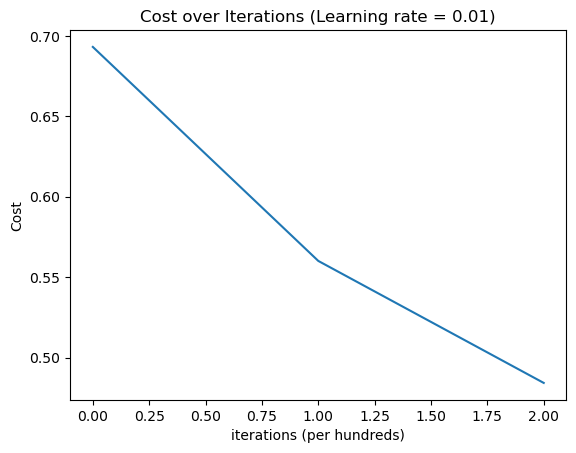

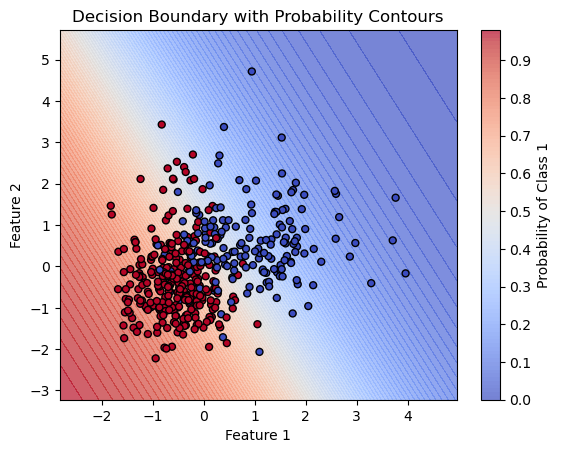

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.382204
Cost after iteration 200: 0.326623
Train Accuracy: 88.57%
Test Accuracy: 91.23%


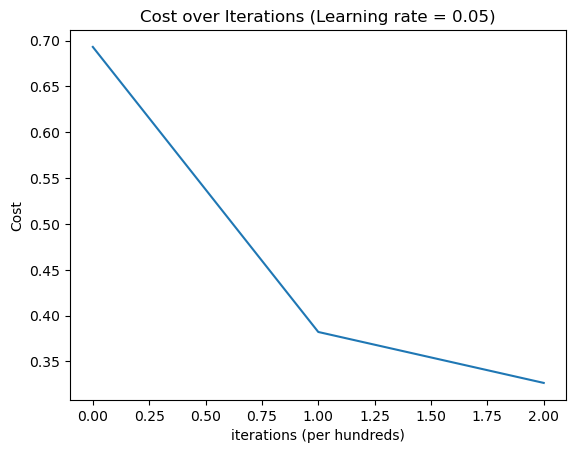

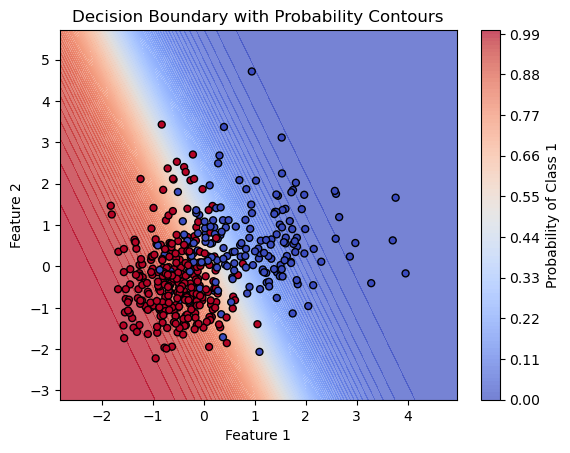

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.326369
Cost after iteration 200: 0.292905
Train Accuracy: 88.35%
Test Accuracy: 89.47%


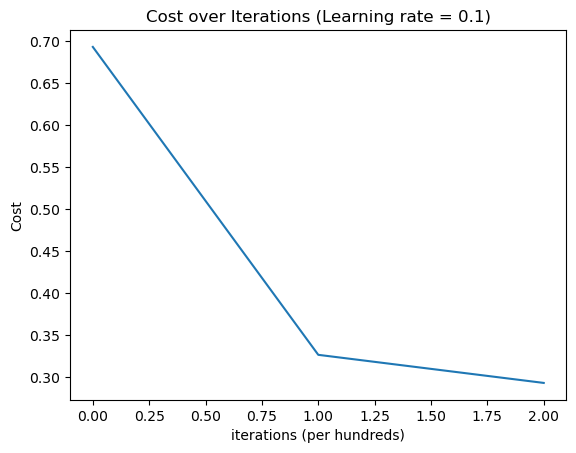

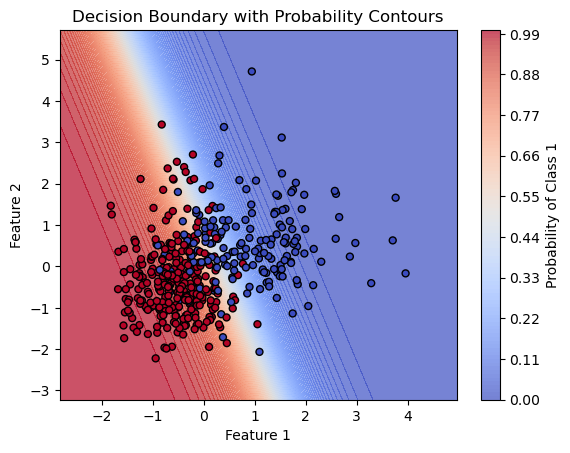

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.326369
Cost after iteration 200: 0.292905
Cost after iteration 300: 0.281403
Cost after iteration 400: 0.275990
Train Accuracy: 88.79%
Test Accuracy: 90.35%


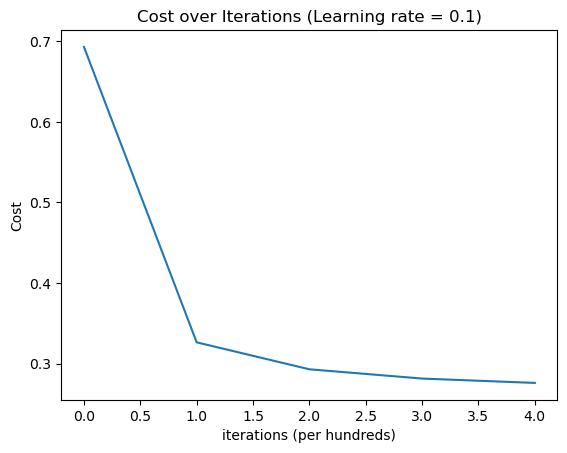

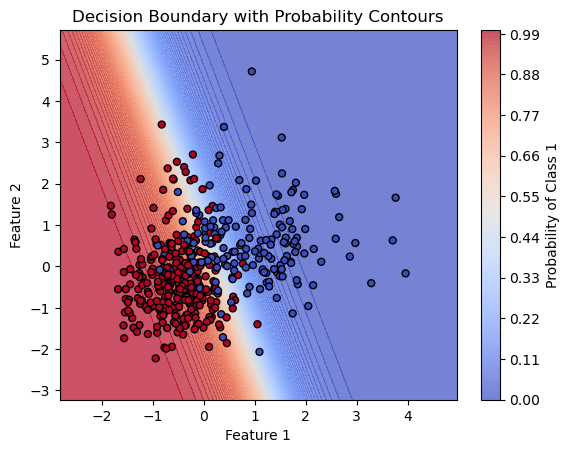

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.272909
Cost after iteration 200: 0.268756
Cost after iteration 300: 0.268183
Cost after iteration 400: 0.268079
Train Accuracy: 89.23%
Test Accuracy: 91.23%


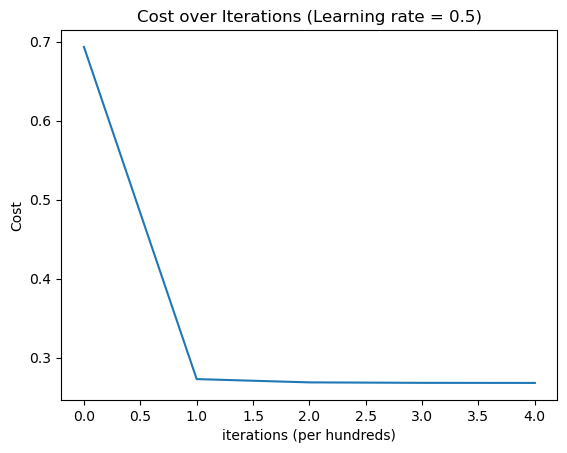

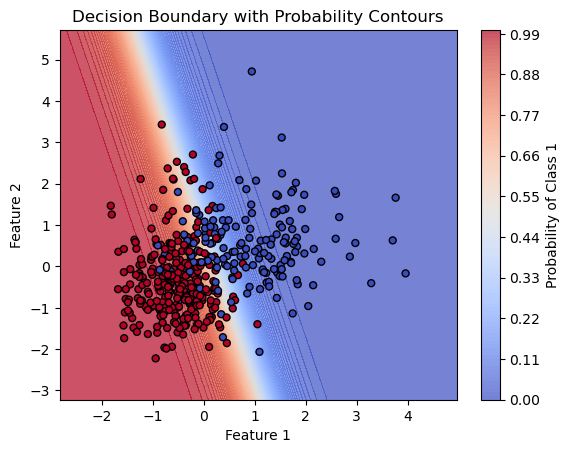

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.268729
Cost after iteration 200: 0.268077
Cost after iteration 300: 0.268053
Cost after iteration 400: 0.268052
Cost after iteration 500: 0.268052
Cost after iteration 600: 0.268052
Cost after iteration 700: 0.268052
Cost after iteration 800: 0.268052
Cost after iteration 900: 0.268052
Train Accuracy: 89.01%
Test Accuracy: 91.23%


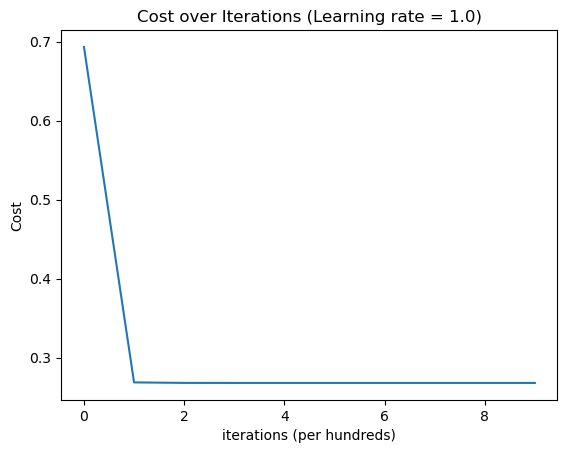

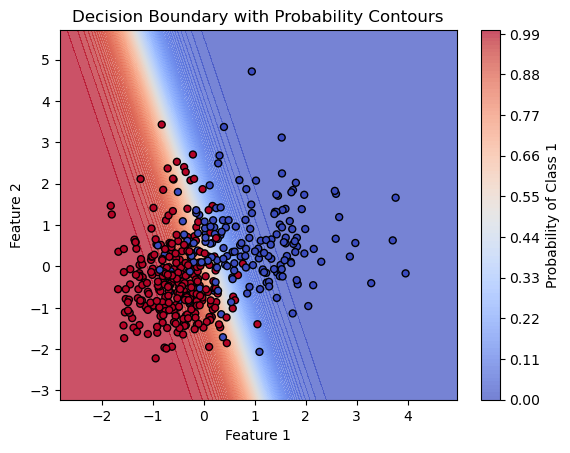

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.326369
Cost after iteration 200: 0.292905
Train Accuracy: 88.35%
Test Accuracy: 89.47%


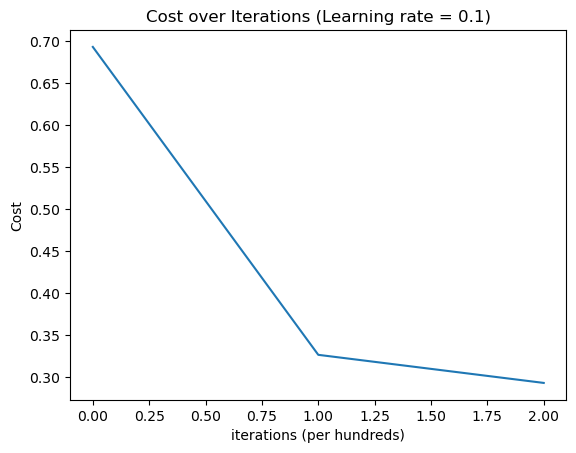

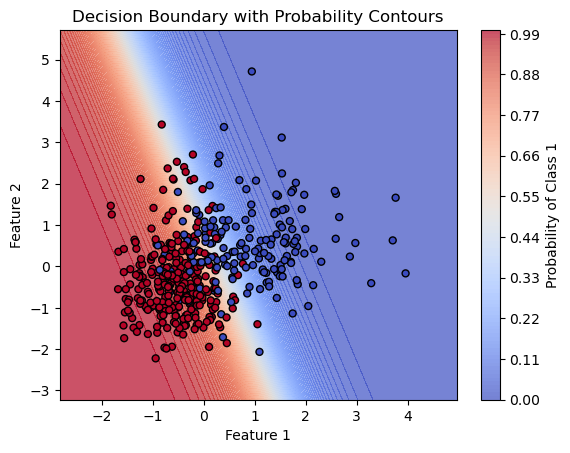

In [68]:
# TODO: 다양한 learning rate와 num_iterations에 대해 실험해보세요.
# TODO: 다양한 learning rate와 num_iterations에 대해 실험해보세요.
main(num_iterations = 100, learning_rate = 0.01)
main(num_iterations = 300, learning_rate = 0.01)
main(num_iterations = 300, learning_rate = 0.05)
main(num_iterations = 300, learning_rate = 0.1)
main(num_iterations = 500, learning_rate = 0.1)
main(num_iterations = 500, learning_rate = 0.5)
main(num_iterations = 1000, learning_rate = 1.0)
main(num_iterations = 300, learning_rate = 0.1)

**Key Takeaways:**
    
You've implemented:
- Initialize weights (w,b) for a model
- Optimize the parameters (w,b) iteratively :
    - Computing the cost and its gradient 
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples
- Tuning the hyperparameter can make a big difference to the algorithm. You will see more examples of this later in this course!